# **Import Library and Read Dataset**

In [ ]:
# Import Library
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter
import matplotlib.gridspec as gridspec # Alignments 

import seaborn as sns # theme & dataset

# for visualization samples
import pandas as pd

In [ ]:
# Download data "marketing_campaign.csv" di https://www.kaggle.com/rodsaldanha/arketing-campaign for dataset

# Ini untuk upload dataset dari local ke google colab
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving marketing_campaign.csv to marketing_campaign.csv
User uploaded file "marketing_campaign.csv" with length 215708 bytes


In [ ]:
data = pd.read_csv("marketing_campaign.csv")
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-12,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-14,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-13,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-14,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-14,94,173,...,5,0,0,0,0,0,0,3,11,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

# **Anatomy of Figure matplotlib**

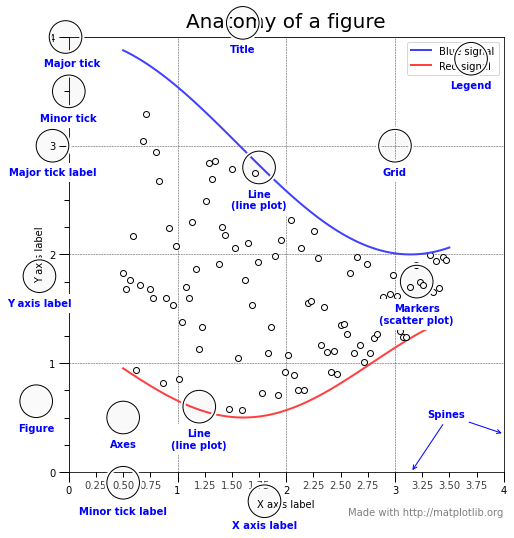

In [ ]:
np.random.seed(19680801)

X = np.linspace(0.5, 3.5, 100)
Y1 = 3+np.cos(X)
Y2 = 1+np.cos(1+X/0.75)/2
Y3 = np.random.uniform(Y1, Y2, len(X))

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1, aspect=1)


def minor_tick(x, pos):
    if not x % 1.0:
        return ""
    return "%.2f" % x

ax.xaxis.set_major_locator(MultipleLocator(1.000))
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_major_locator(MultipleLocator(1.000))
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
ax.xaxis.set_minor_formatter(FuncFormatter(minor_tick))

ax.set_xlim(0, 4)
ax.set_ylim(0, 4)

ax.tick_params(which='major', width=1.0)
ax.tick_params(which='major', length=10)
ax.tick_params(which='minor', width=1.0, labelsize=10)
ax.tick_params(which='minor', length=5, labelsize=10, labelcolor='0.25')

ax.grid(linestyle="--", linewidth=0.5, color='.25', zorder=-10)

ax.plot(X, Y1, c=(0.25, 0.25, 1.00), lw=2, label="Blue signal", zorder=10)
ax.plot(X, Y2, c=(1.00, 0.25, 0.25), lw=2, label="Red signal")
ax.plot(X, Y3, linewidth=0,
        marker='o', markerfacecolor='w', markeredgecolor='k')

ax.set_title("Anatomy of a figure", fontsize=20, verticalalignment='bottom')
ax.set_xlabel("X axis label")
ax.set_ylabel("Y axis label")

ax.legend()


def circle(x, y, radius=0.15):
    from matplotlib.patches import Circle
    from matplotlib.patheffects import withStroke
    circle = Circle((x, y), radius, clip_on=False, zorder=10, linewidth=1,
                    edgecolor='black', facecolor=(0, 0, 0, .0125),
                    path_effects=[withStroke(linewidth=5, foreground='w')])
    ax.add_artist(circle)


def text(x, y, text):
    ax.text(x, y, text, backgroundcolor="white",
            ha='center', va='top', weight='bold', color='blue')


# Minor tick
circle(0.50, -0.10)
text(0.50, -0.32, "Minor tick label")

# Major tick
circle(-0.03, 4.00)
text(0.03, 3.80, "Major tick")

# Minor tick
circle(0.00, 3.50)
text(0.00, 3.30, "Minor tick")

# Major tick label
circle(-0.15, 3.00)
text(-0.15, 2.80, "Major tick label")

# X Label
circle(1.80, -0.27)
text(1.80, -0.45, "X axis label")

# Y Label
circle(-0.27, 1.80)
text(-0.27, 1.6, "Y axis label")

# Title
circle(1.60, 4.13)
text(1.60, 3.93, "Title")

# Blue plot
circle(1.75, 2.80)
text(1.75, 2.60, "Line\n(line plot)")

# Red plot
circle(1.20, 0.60)
text(1.20, 0.40, "Line\n(line plot)")

# Scatter plot
circle(3.20, 1.75)
text(3.20, 1.55, "Markers\n(scatter plot)")

# Grid
circle(3.00, 3.00)
text(3.00, 2.80, "Grid")

# Legend
circle(3.70, 3.80)
text(3.70, 3.60, "Legend")

# Axes
circle(0.5, 0.5)
text(0.5, 0.3, "Axes")

# Figure
circle(-0.3, 0.65)
text(-0.3, 0.45, "Figure")

color = 'blue'
ax.annotate('Spines', xy=(4.0, 0.35), xytext=(3.3, 0.5),
            weight='bold', color=color,
            arrowprops=dict(arrowstyle='->',
                            connectionstyle="arc3",
                            color=color))

ax.annotate('', xy=(3.15, 0.0), xytext=(3.45, 0.45),
            weight='bold', color=color,
            arrowprops=dict(arrowstyle='->',
                            connectionstyle="arc3",
                            color=color))

ax.text(4.0, -0.4, "Made with http://matplotlib.org",
        fontsize=10, ha="right", color='.5')

plt.show()

# **Subplots Layout**

* subplots
* subplot2grid
* add_axes
* gridspec, add_subplot
* inset_axes
* make_axes_locatable

## subplots

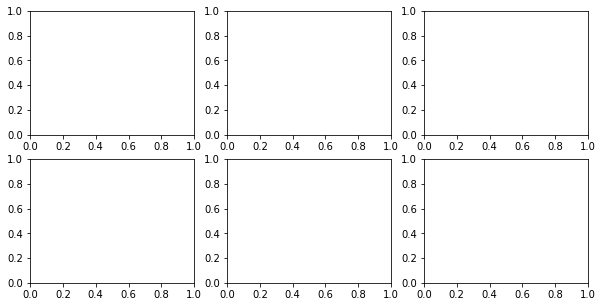

In [ ]:
# subplots

fig, axes = plt.subplots(2, 3, figsize=(10, 5))
plt.show()

The first of the plt.subplot() parameters specifies the number of rows and the second the number of columns. The graph looks a bit frustrating. In this case, you can use plt.tight_layout() to solve the frustration.

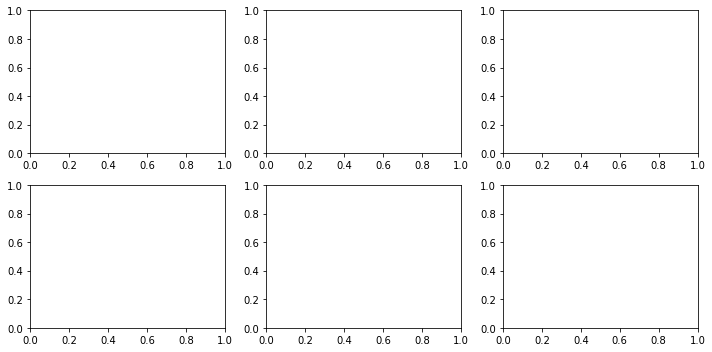

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(10, 5))
plt.tight_layout()
plt.show()

## subplot2grid

To make different sizes of subplots, use plt.subplot2grid

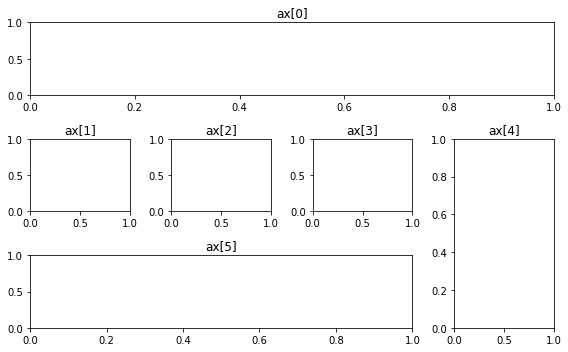

In [ ]:
# with subplot2grid

fig = plt.figure(figsize=(8, 5)) # initialize figure

ax = [None for _ in range(6)] # list to save many ax for setting parameter in each

ax[0] = plt.subplot2grid((3,4), (0,0), colspan=4)
ax[1] = plt.subplot2grid((3,4), (1,0), colspan=1)
ax[2] = plt.subplot2grid((3,4), (1,1), colspan=1)
ax[3] = plt.subplot2grid((3,4), (1,2), colspan=1)
ax[4] = plt.subplot2grid((3,4), (1,3), colspan=1,rowspan=2)
ax[5] = plt.subplot2grid((3,4), (2,0), colspan=3)


for ix in range(6): 
  ax[ix].set_title('ax[{}]'.format(ix)) # make ax title for distinguish:)
    
fig.tight_layout()
plt.show()

## add_axes

Alternatively, you can use plt.add_axes() to create an ax where you want.

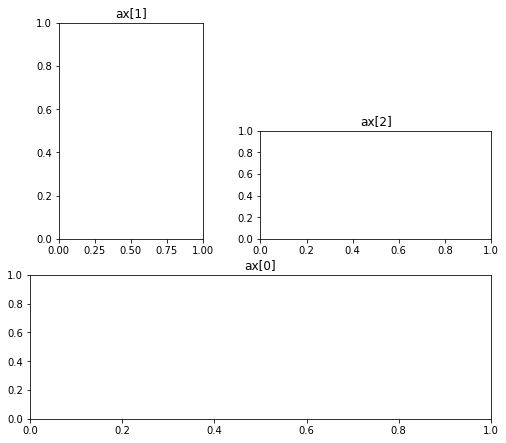

In [ ]:
fig = plt.figure(figsize=(8, 5))

ax = [None for _ in range(3)]


ax[0] = fig.add_axes([0.1,0.1,0.8,0.4]) # x, y, dx, dy
ax[1] = fig.add_axes([0.15,0.6,0.25,0.6])
ax[2] = fig.add_axes([0.5,0.6,0.4,0.3])

for ix in range(3):
  ax[ix].set_title('ax[{}]'.format(ix))

plt.show()

## gridspec, add_subplot

Another way is to use gridspec. This allows you to use add_subplot together, similar to subplots to grid.

This approach allows you to take advantage of the concept of list to use a developer-friendly grid.

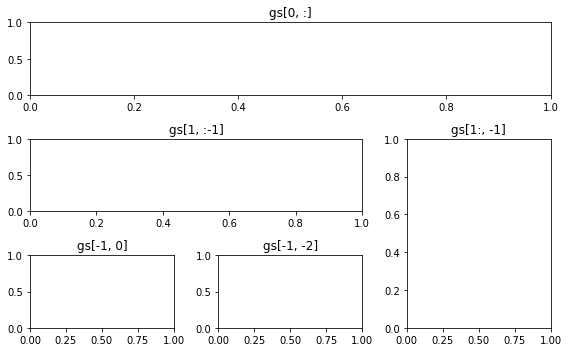

In [ ]:
fig = plt.figure(figsize=(8, 5))

gs = fig.add_gridspec(3, 3) # make 3 by 3 grid (row, col)

ax = [None for _ in range(5)]

ax[0] = fig.add_subplot(gs[0, :]) 
ax[0].set_title('gs[0, :]')

ax[1] = fig.add_subplot(gs[1, :-1])
ax[1].set_title('gs[1, :-1]')

ax[2] = fig.add_subplot(gs[1:, -1])
ax[2].set_title('gs[1:, -1]')

ax[3] = fig.add_subplot(gs[-1, 0])
ax[3].set_title('gs[-1, 0]')

ax[4] = fig.add_subplot(gs[-1, -2])
ax[4].set_title('gs[-1, -2]')

plt.tight_layout()
plt.show()

## inset_axes

Here you can change the color of ax or plt itself, such as facecolor, to make it look more dashboard-like.

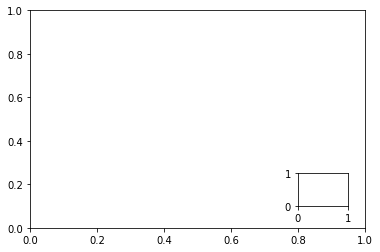

In [ ]:
fig, ax = plt.subplots()
axin1 = ax.inset_axes([0.8, 0.1, 0.15, 0.15])
plt.show()

## make_axes_locatable

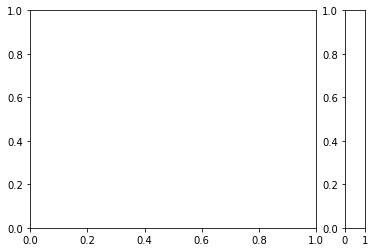

In [ ]:
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable

fig, ax = plt.subplots(1, 1)
ax_divider = make_axes_locatable(ax)

ax = ax_divider.append_axes("right", size="7%", pad="10%")
plt.show()

# **Colormap**

Color is very important in the graph. Of course the matplotlib team has already created a good color palette, and we just need to use it.

Color palette in matplotlib and which graph to use.

* diverging
* qualitative
* sequential
* scientific


## Diverging Colormap

This colormap is usually used in visualizations where the median is obvious.

It is usually visualized on a white background, white in the center, and darker in color toward both ends. In other words, the lighter the value, the closer to the center, the darker, the closer to the end.

Useful for expressing bias, such as correlation and political disposition.

Currently it is a continuous colormap, but you can also use discrete colorpalette depending on the interval.

matplotlib loads the library's palette with that element in the cmap parameter. You can, of course, make it custom.

In [ ]:
def cmap_plot(cmap_list, ctype):
    cmaps = cmap_list

    n = len(cmaps)

    fig = plt.figure(figsize=(8.25, n*.20), dpi=200)
    ax = plt.subplot(1, 1, 1, frameon=False, xlim=[0,10], xticks=[], yticks=[])
    fig.subplots_adjust(top=0.99, bottom=0.01, left=0.18, right=0.99)

    y, dy, pad = 0, 0.3, 0.08

    ticks, labels = [], []

    for cmap in cmaps[::-1]:
        Z = np.linspace(0,1,512).reshape(1,512)
        plt.imshow(Z, extent=[0,10,y,y+dy], cmap=plt.get_cmap(cmap))
        ticks.append(y+dy/2)
        labels.append(cmap)
        y = y + dy + pad

    ax.set_ylim(-pad,y)
    ax.set_yticks(ticks)
    ax.set_yticklabels(labels)

    ax.tick_params(axis='y', which='both', length=0, labelsize=5)
    plt.title(f'{ctype} Colormap', fontweight='bold', fontsize=8)
    plt.show()

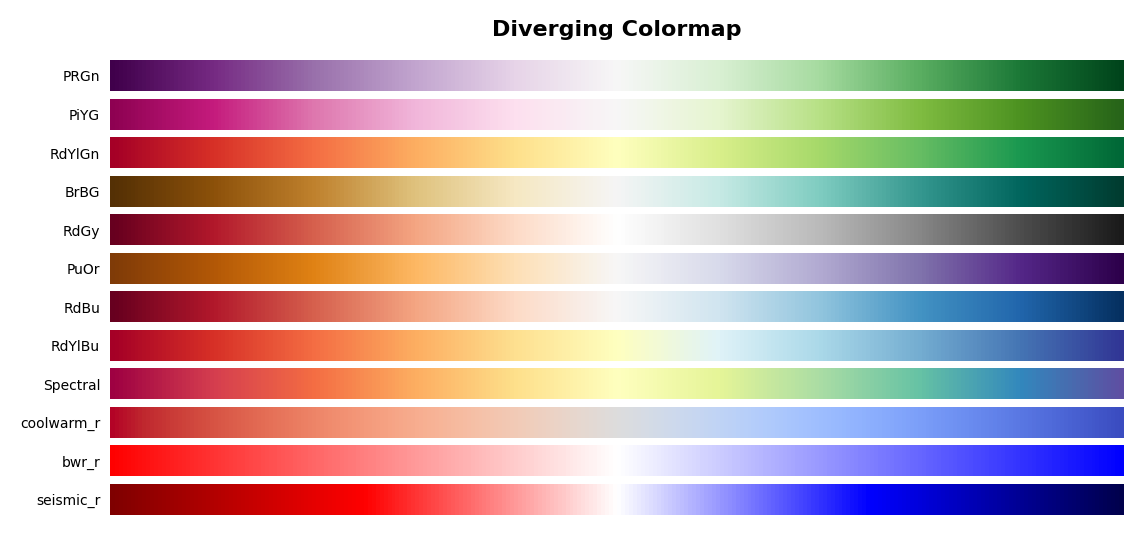

In [ ]:
# _r mean reverse
diverge_cmap = ('PRGn', 'PiYG', 'RdYlGn', 'BrBG', 'RdGy', 'PuOr', 'RdBu', 'RdYlBu',  'Spectral', 'coolwarm_r', 'bwr_r', 'seismic_r')
cmap_plot(diverge_cmap, 'Diverging')

## Qualitative Colormap

A palette of independent colors, often used for categorical variables.

It is recommended to organize up to 10 colors, and to group more and smaller categories with other.

Repeating colors can be confusing, so try to avoid overlapping as much as possible. It's a good idea to change color to color rather than saturation and brightness.

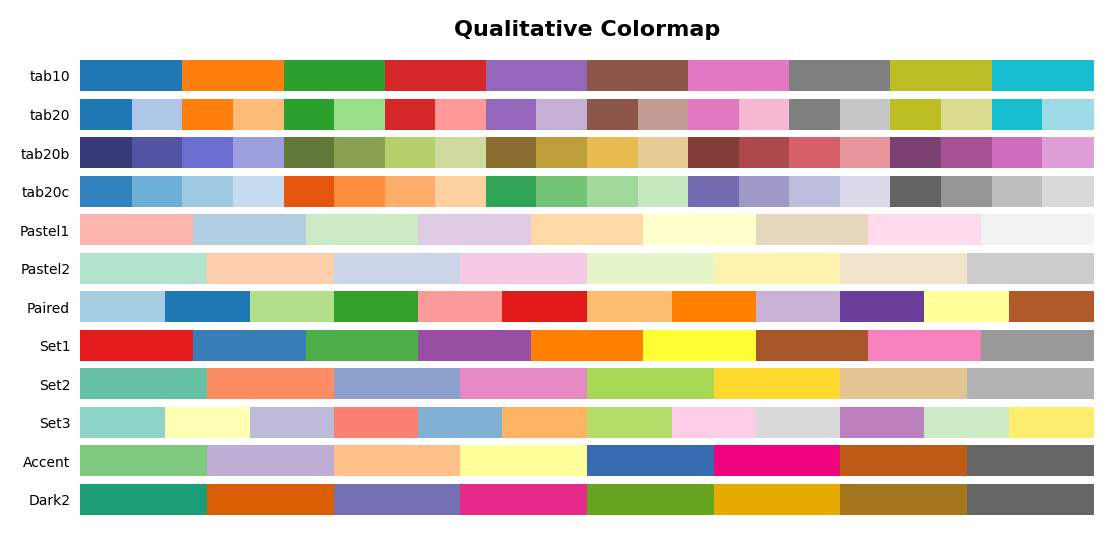

In [ ]:
qualitative_cmap = ('tab10', 'tab20', 'tab20b', 'tab20c',
         'Pastel1', 'Pastel2', 'Paired',
         'Set1', 'Set2', 'Set3', 'Accent', 'Dark2' )

cmap_plot(qualitative_cmap, 'Qualitative')

## Sequential Colormap

This palette is appropriate for variables with numbers or sorted values.

Used a lot in comparison of figures. Especially effective for expressing density. Take advantage of map graphs for better visualization.

Similar to diverging, but with a slightly different part because each endpoint is a color criterion, not the median. It usually indicates that light values are dark on dark backgrounds and dark values on light backgrounds.

It is recommended to use a single hue for the color.

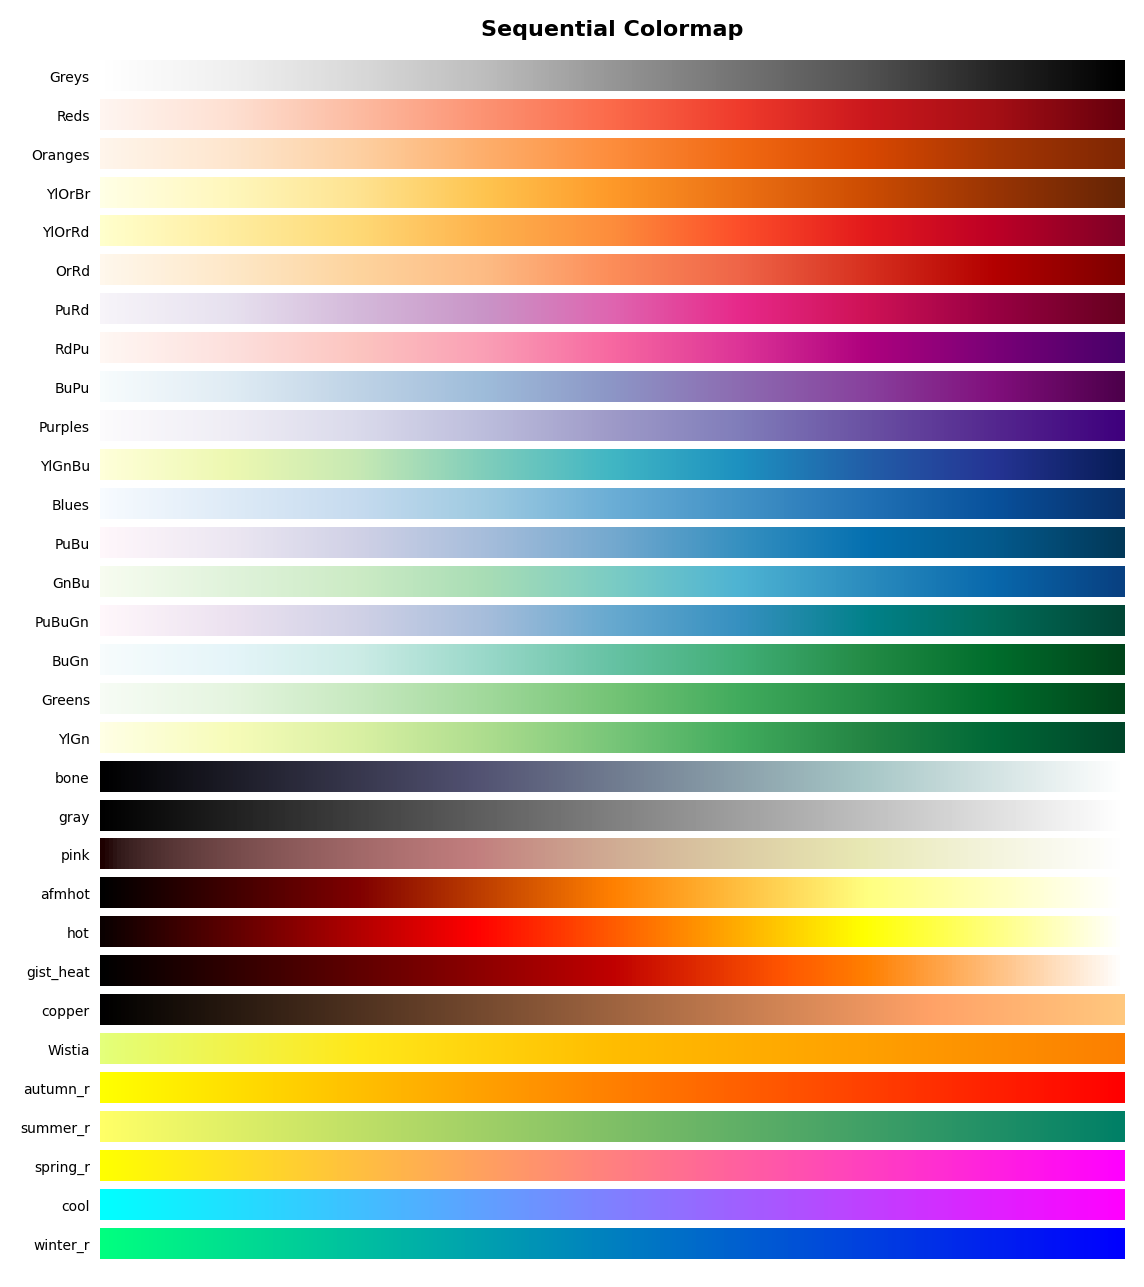

In [ ]:
sequential_cmap = ('Greys', 'Reds', 'Oranges', 
         'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
         'Purples', 'YlGnBu', 'Blues', 'PuBu', 'GnBu', 'PuBuGn', 'BuGn',
         'Greens', 'YlGn','bone', 'gray', 'pink', 'afmhot', 'hot', 'gist_heat', 'copper', 
         'Wistia', 'autumn_r', 'summer_r', 'spring_r', 'cool', 'winter_r')            

cmap_plot(sequential_cmap, 'Sequential')

## Scientific Colormap

It is used as a basic colormap of plotly and has high utilization and relatively professional feel. it often used in signal data like spectrograms when dealing with voice data.

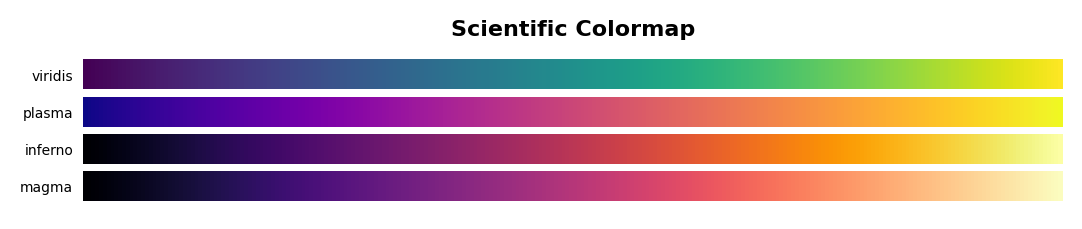

In [ ]:
scientific_cmap = ('viridis', 'plasma', 'inferno', 'magma')
cmap_plot(scientific_cmap, 'Scientific')

# **Learned Plot**

**Color Library in matplotlib**

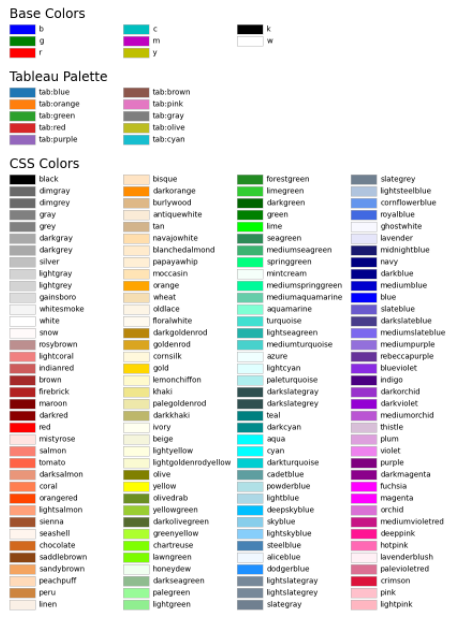

**Markers in matplotlib**

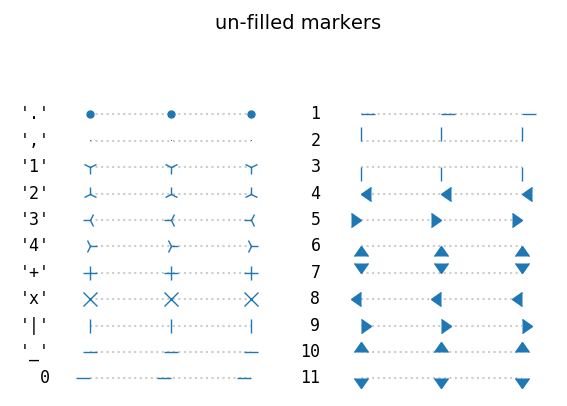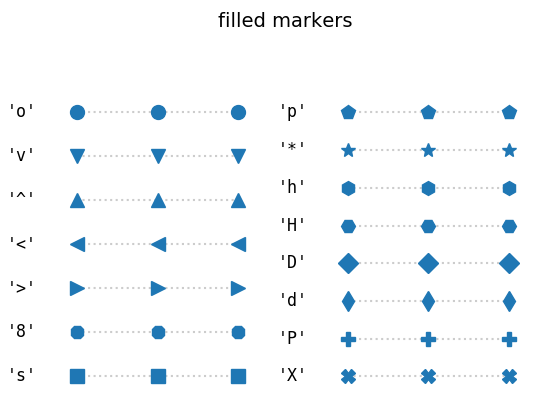

## Data Preparation

In [ ]:
data.Income.isnull().sum()

24

In [ ]:
df = data.dropna()

In [ ]:
print(df.Income.isnull().sum())
print(df.shape)
print(df.info())
df.head()

0
(2216, 29)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2216 non-null   int64  
 1   Year_Birth           2216 non-null   int64  
 2   Education            2216 non-null   object 
 3   Marital_Status       2216 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2216 non-null   int64  
 6   Teenhome             2216 non-null   int64  
 7   Dt_Customer          2216 non-null   object 
 8   Recency              2216 non-null   int64  
 9   MntWines             2216 non-null   int64  
 10  MntFruits            2216 non-null   int64  
 11  MntMeatProducts      2216 non-null   int64  
 12  MntFishProducts      2216 non-null   int64  
 13  MntSweetProducts     2216 non-null   int64  
 14  MntGoldProds         2216 non-null   int64  
 15  NumDealsPurchases    2216

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-12,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-14,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-13,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-14,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-14,94,173,...,5,0,0,0,0,0,0,3,11,0


In [ ]:
edu = df['Education'].value_counts()
mar = df['Marital_Status'].value_counts()

display(edu)
display(mar)

Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64

Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [ ]:
ed_b = df[df['Education'] == 'Basic']
ed_g = df[df['Education'] == 'Graduation']
ed_m = df[df['Education'] == 'Master']
ed_p = df[df['Education'] == 'PhD']
ed_c = df[df['Education'] == '2n Cycle']

in_b = (ed_b['Income']).mean()
in_g = (ed_g['Income']).mean()
in_m = (ed_m['Income']).mean()
in_p = (ed_p['Income']).mean()
in_c = (ed_c['Income']).mean()

dic = [{'Education': 'Basic', 'Income':in_b},
        {'Education': 'Gradute', 'Income':in_g},
        {'Education': 'Master', 'Income':in_m},
        {'Education': 'PhD', 'Income':in_p},
        {'Education': '2n Cycle', 'Income':in_c}]
ex_1 = pd.DataFrame(dic)
ex_1

,Education,Income
0,Basic,20306.259259
1,Gradute,52720.373656
2,Master,52917.534247
3,PhD,56145.313929
4,2n Cycle,47633.190000


In [ ]:
ms_m = df[df['Marital_Status'] == 'Married']
ms_t = df[df['Marital_Status'] == 'Together']
ms_s = df[df['Marital_Status'] == 'Single']
ms_d = df[df['Marital_Status'] == 'Divorced']
ms_w = df[df['Marital_Status'] == 'Widow']

inc_m = (ms_m['Income']).mean()
inc_t = (ms_t['Income']).mean()
inc_s = (ms_s['Income']).mean()
inc_d = (ms_d['Income']).mean()
inc_w = (ms_w['Income']).mean()

dic = [{'Marital_Status': 'Married', 'Income':inc_m},
        {'Marital_Status': 'Together', 'Income':inc_t},
        {'Marital_Status': 'Single', 'Income':inc_s},
        {'Marital_Status': 'Divorced', 'Income':inc_d},
        {'Marital_Status':  'Widow', 'Income':inc_w}]
ex_2 = pd.DataFrame(dic)
ex_2

,Marital_Status,Income
0,Married,51724.978996
1,Together,53245.534031
2,Single,50995.350318
3,Divorced,52834.228448
4,Widow,56481.552632


## Density Chart

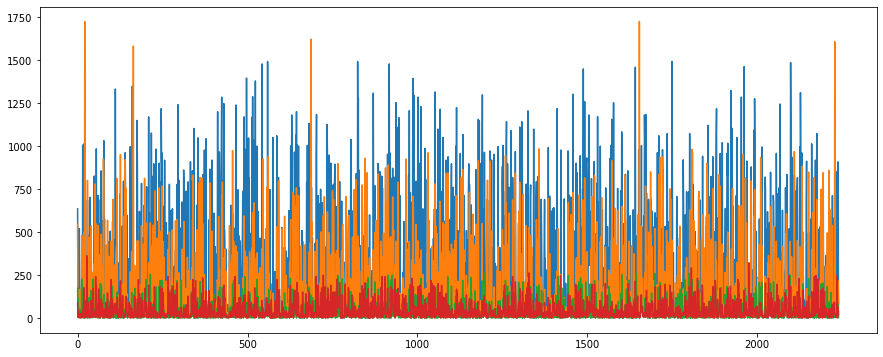

In [ ]:
fig, ax = plt.subplots(0,1, figsize=(15,6))
ax = plt.plot(data[['MntWines', 'MntMeatProducts', 'MntFishProducts', 'MntGoldProds']])

## Scatter Plot

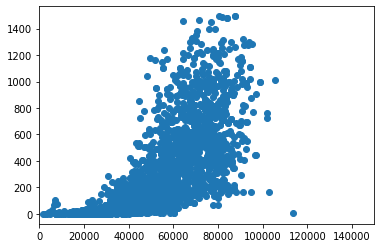

In [ ]:
plt.scatter(data['Income'],data['MntWines'])
plt.xlim(0,150000)
plt.show()

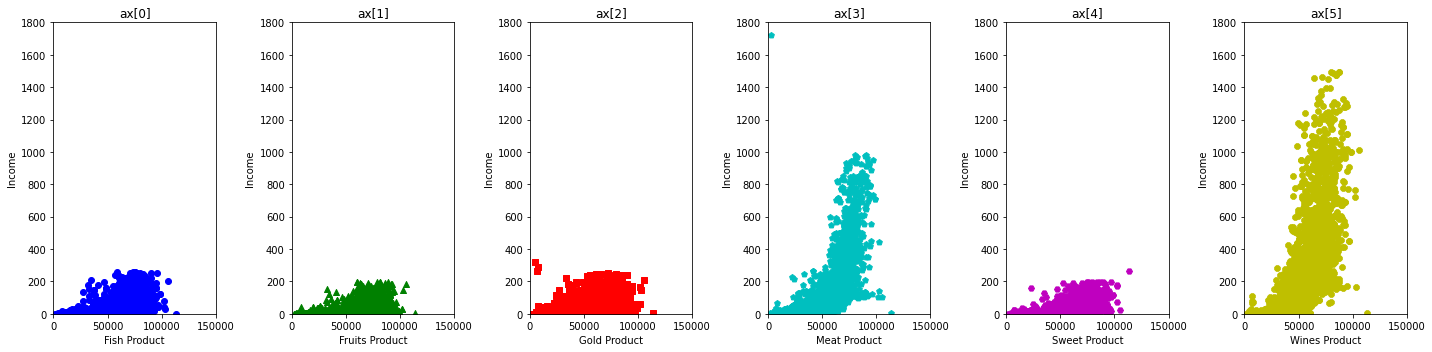

In [ ]:
fig, ax = plt.subplots(1,6, figsize= (20,5))

ax[0].scatter(data['Income'], data['MntFishProducts'], color='b', marker='o')
ax[1].scatter(data['Income'], data['MntFruits'], color='g', marker='^')
ax[2].scatter(data['Income'], data['MntGoldProds'], color='r', marker='s')
ax[3].scatter(data['Income'], data['MntMeatProducts'], color='c', marker='p')
ax[4].scatter(data['Income'], data['MntSweetProducts'], color='m', marker='H')
ax[5].scatter(data['Income'], data['MntWines'], color='y', marker='8')

ax[0].set_xlabel('Fish Product')
ax[1].set_xlabel('Fruits Product')
ax[2].set_xlabel('Gold Product')
ax[3].set_xlabel('Meat Product')
ax[4].set_xlabel('Sweet Product')
ax[5].set_xlabel('Wines Product')

for ix in range(6):
  ax[ix].set_ylim(0,1800) # limitting y axis
  ax[ix].set_xlim(0,150000)
  ax[ix].set_ylabel('Income')
  ax[ix].set_title('ax[{}]'.format(ix))

plt.tight_layout()
plt.show()

## Bar Chart

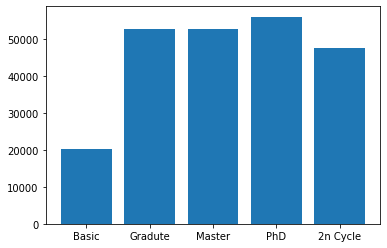

In [ ]:
fig, ax = plt.subplots()

ax.bar(ex_1['Education'], ex_1['Income'])

plt.show()

Text(0, 0.5, 'Martial Status')

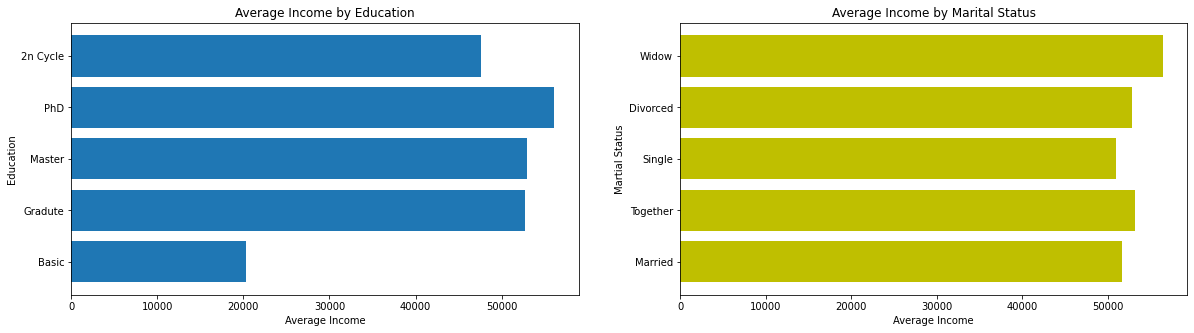

In [ ]:
fig, ax = plt.subplots(1,2, figsize= (20,5))

ax[0].barh(ex_1['Education'], ex_1['Income'])
ax[1].barh(ex_2['Marital_Status'], ex_2['Income'], color ='y')

ax[0].set_title('Average Income by Education')
ax[1].set_title('Average Income by Marital Status')

ax[0].set_xlabel('Average Income')
ax[0].set_ylabel('Education')

ax[1].set_xlabel('Average Income')
ax[1].set_ylabel('Martial Status')

## CMap

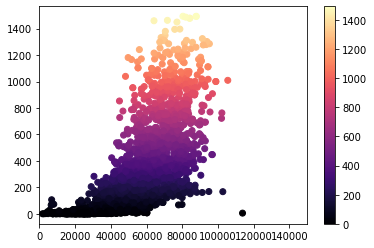

In [ ]:
t = data['MntWines']

plt.scatter(data['Income'],data['MntWines'], c=t, cmap='magma')
plt.colorbar()
plt.xlim(0,150000)
plt.show()

## Histogram

<function matplotlib.pyplot.show>

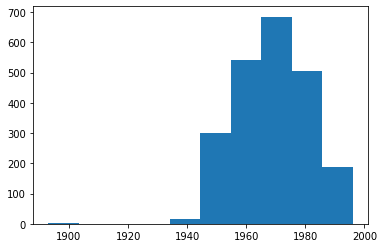

In [ ]:
plt.hist(data['Year_Birth'])
plt.show

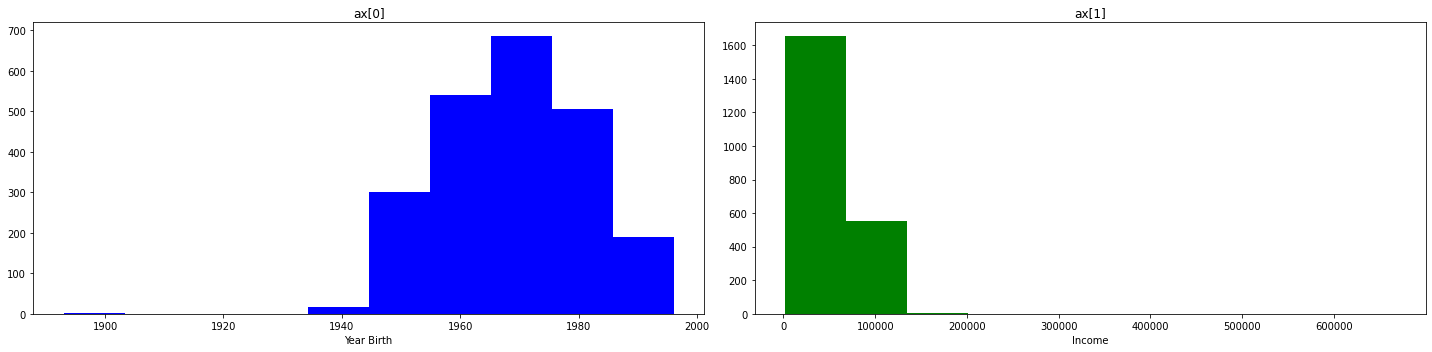

In [ ]:
fig, ax = plt.subplots(1,2, figsize= (20,5))

ax[0].hist(data['Year_Birth'], color='b')
ax[1].hist(data['Income'], color='g')

ax[0].set_xlabel('Year Birth')
ax[1].set_xlabel('Income')

for ix in range(2):
  ax[ix].set_title('ax[{}]'.format(ix))

plt.tight_layout()
plt.show()

## Pie Chart

## Box Plot

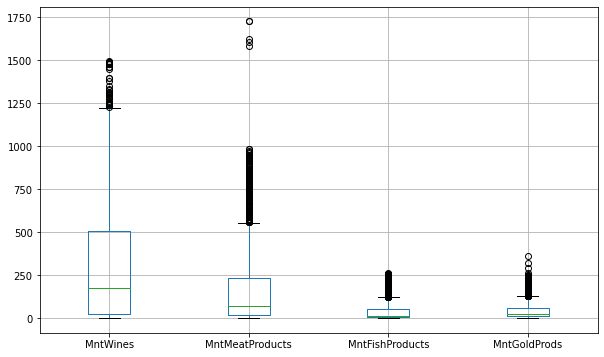

In [ ]:
fig = plt.subplots(figsize=(10,6))
ax = data[['MntWines','MntMeatProducts','MntFishProducts','MntGoldProds']]
ax.boxplot(notch = False, widths = 0.3)

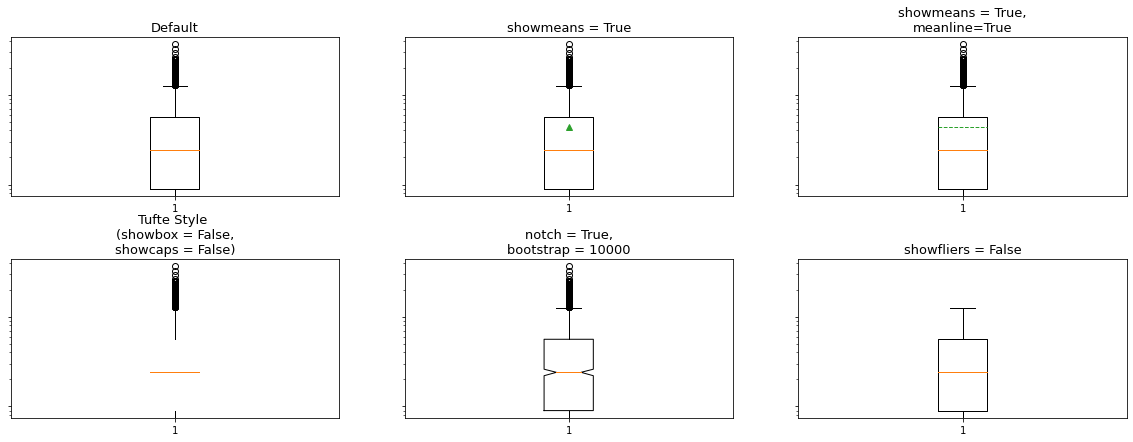

In [ ]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(20, 7), sharey=True)

axs[0, 0].boxplot(data['MntGoldProds'])
axs[0, 0].set_title('Default', fontsize = 13)

axs[0, 1].boxplot(data['MntGoldProds'], showmeans = True)
axs[0, 1].set_title('showmeans = True', fontsize = 13)

axs[0, 2].boxplot(data['MntGoldProds'], showmeans = True, meanline = True)
axs[0, 2].set_title('showmeans = True,\nmeanline=True', fontsize = 13)

axs[1, 0].boxplot(data['MntGoldProds'], showbox = False, showcaps = False)
tufte_title = 'Tufte Style \n(showbox = False,\nshowcaps = False)'
axs[1, 0].set_title(tufte_title, fontsize=13)

axs[1, 1].boxplot(data['MntGoldProds'], notch = True, bootstrap = 10000)
axs[1, 1].set_title('notch = True,\nbootstrap = 10000', fontsize = 13)

axs[1, 2].boxplot(data['MntGoldProds'], showfliers = False)
axs[1, 2].set_title('showfliers = False', fontsize = 13)

for ax in axs.flat:
    ax.set_yscale('log')
    ax.set_yticklabels([])

fig.subplots_adjust(hspace = 0.4)
plt.show()